# TOF plotting demo
Just a basic example notebook showing how to use the tof basic tof plotting routines.
   
jonathan.bower@unh.edu

cheers,   
Jon


In [1]:
import pandas as pd
import pyMAP as pm
%matplotlib notebook

Initalize connection controller for jill

In [2]:
jill = pm.jill()

Jill Username: jsx54
········


show the available tables

In [3]:
jill.tables.keys()

dict_keys(['ILO_EM_DE', 'ILO_EM_IFB', 'ILO_EM_RAW_CNT', 'ILO_EM_TOF_BD', 'ingest_log'])

## Query when command
- simplifies syntax of time dependent querying
- allows for loading of multiple tables (when given a list), resulting table is merged between the two for easy use

In [3]:
help(jill.queryWhen)

Help on method queryWhen in module pyMAP.pyMAP.jill:

queryWhen(table='', after='', before='', cols='*') method of pyMAP.pyMAP.jill.jill instance



In [4]:
jill.queryWhen(['ILO_EM_IFB', 'ILO_EM_RAW_CNT'],"2022-11-16 13:50","2022-11-16 14:50")

,SHCOARSE,IF_COMMAND_ERROR,IF_TRANSMITTING,IF_READY,IF_STATE,COMMAND_ADDRESS,COMMAND_DATA,REG_IF_STATUS_PKT_RCVD,REG_IF_STATUS_TO_ERR,REG_IF_STATUS_ID_ERR,...,Eff_A,Eff_C1,Eff_C2,Eff_C,Eff_B1,Eff_B0,Eff_B,Eff_TRIP1,Eff_TRIP2,Eff_TRIP
dateTime,,,,,,,,,,,,,,,,,,,,,
2022-11-16 13:50:01-05:00,2.553786e+09,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-16 13:50:03-05:00,2.553786e+09,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-16 13:50:06-05:00,2.553786e+09,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-16 13:50:08-05:00,2.553786e+09,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-16 13:50:11-05:00,2.553786e+09,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-16 14:49:57-05:00,2.553790e+09,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.000198,0.0,0.0,0.0,0.0
2022-11-16 14:49:58-05:00,2.553790e+09,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2022-11-16 14:49:58-05:00,2.553790e+09,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Direct event plotting functions

load direct event data 

In [5]:
dat = jill.queryWhen('ILO_EM_DE','2023-01-16 21:42','2023-01-16 21:52')

tofs_1d: generates 1d histogram plots from the given direct event data. reference species lines can be overlayed using the tof_ref_lines parameter, which is passed as input to pyMAP.tof.tof_expected.

In [15]:
help(pm.plt.tofs_1d)

Help on function tofs_1d in module pyMAP.pyMAP.plt:

tofs_1d(dats, hist_plt=['TOF0', 'TOF1', 'TOF2', 'TOF3'], bins=75, bin_range={'TOF0': [0.1, 350], 'TOF1': [0.1, 250], 'TOF2': [0.1, 150], 'TOF3': [0.1, 50]}, logbins=False, norm=None, legend=False, legend_loc='inside', tof_ref_lines={}, units='[nS]')



<IPython.core.display.Javascript object>


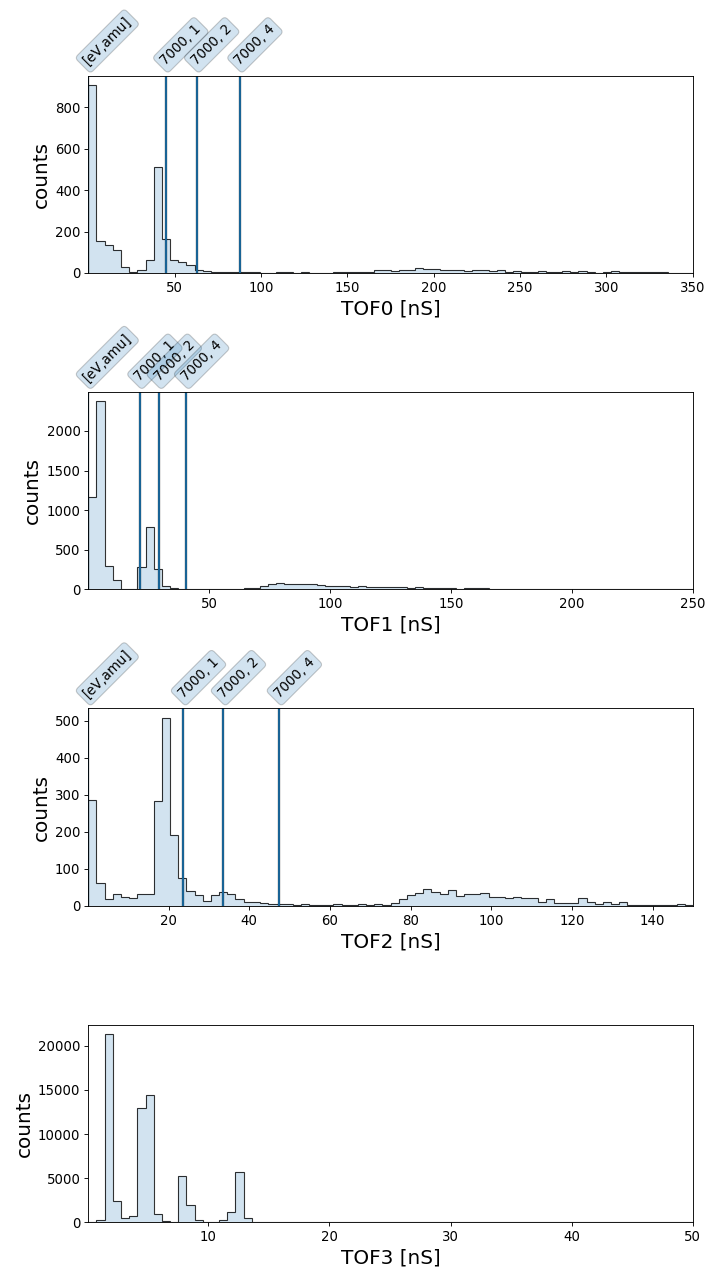

signal
signal
signal
signal


(<Figure size 900x1600 with 4 Axes>,
 array([<Axes: xlabel='TOF0 [nS]', ylabel='counts'>,
        <Axes: xlabel='TOF1 [nS]', ylabel='counts'>,
        <Axes: xlabel='TOF2 [nS]', ylabel='counts'>,
        <Axes: xlabel='TOF3 [nS]', ylabel='counts'>], dtype=object))

In [7]:
pm.plt.tofs_1d(dat,tof_ref_lines = {'species':['H','D','He'],'ke':7000})

 bin_range: alows for designation of upper and lower boundaries of histogram bins.   
 hist_plt: allows for only desired tof spectra to be plotted. 

<IPython.core.display.Javascript object>


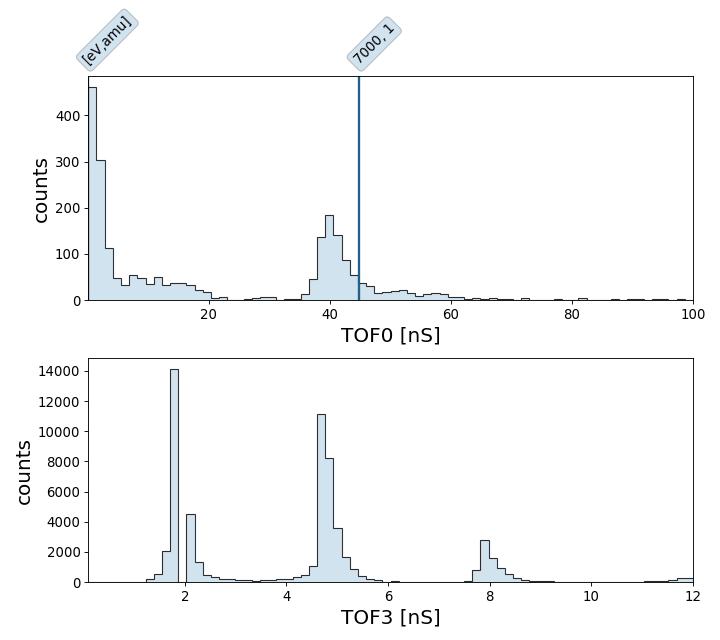

signal
signal


(<Figure size 900x800 with 2 Axes>,
 array([<Axes: xlabel='TOF0 [nS]', ylabel='counts'>,
        <Axes: xlabel='TOF3 [nS]', ylabel='counts'>], dtype=object))

In [9]:
pm.plt.tofs_1d(dat,hist_plt = ['TOF0','TOF3'],
               bin_range={'TOF0': [0.1, 100], 
                          'TOF3': [0.1, 12]},
               tof_ref_lines = {'species':['H'],'ke':7000})


passing a dictionary of pandas data frames will result in the spectra for each data set to be overplotted

<IPython.core.display.Javascript object>


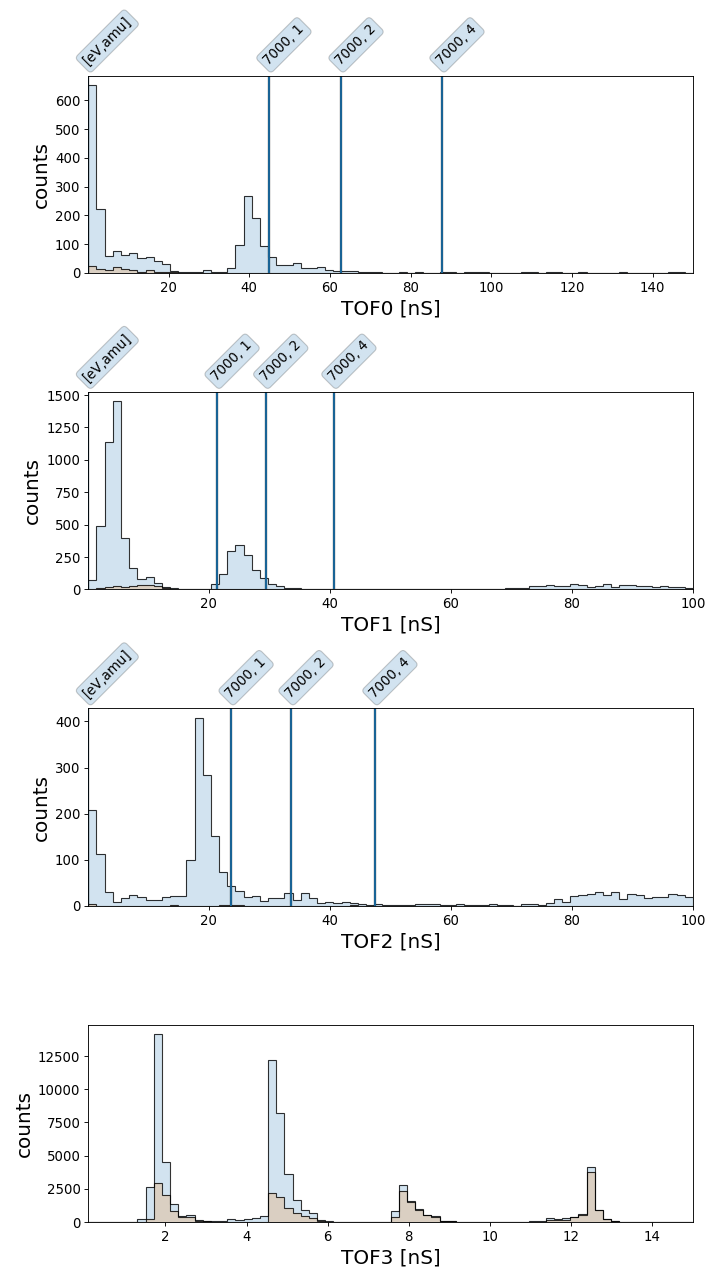

signal
signal
signal
signal


(<Figure size 900x1600 with 4 Axes>,
 array([<Axes: xlabel='TOF0 [nS]', ylabel='counts'>,
        <Axes: xlabel='TOF1 [nS]', ylabel='counts'>,
        <Axes: xlabel='TOF2 [nS]', ylabel='counts'>,
        <Axes: xlabel='TOF3 [nS]', ylabel='counts'>], dtype=object))

In [14]:
dat2 = jill.queryWhen('ILO_EM_DE','2023-01-16 20:42','2023-01-16 20:52')
pm.plt.tofs_1d({'data1':dat,'data2':dat2},
                       bin_range={'TOF0': [0.1, 150], 
                                  'TOF1': [0.1, 100], 
                                  'TOF2': [0.1, 100], 
                                  'TOF3': [0.1, 15]},
                       tof_ref_lines = {'species':['H','D','He'],'ke':7000})

# 2d histogram plotting

2d spectra can be plotted in a similar manner, but with the required pltx and plty (indicating the 2 TOF dimensions we want to generate histograms of

In [15]:
help(pm.plt.tofs_2d)

Help on function tofs_2d in module pyMAP.pyMAP.plt:

tofs_2d(thing, pltx, plty, bins=75, bin_range={'TOF0': [0.1, 350], 'TOF1': [0.1, 250], 'TOF2': [0.1, 150], 'TOF3': [0.1, 50]}, plt_type='scatter', fig=None, ax=None, logbins=False, logcol=True, units='[nS]', tof_ref_lines={}, tof_mass_line=None)



[0.1, 350]
[0.1, 250]


<IPython.core.display.Javascript object>


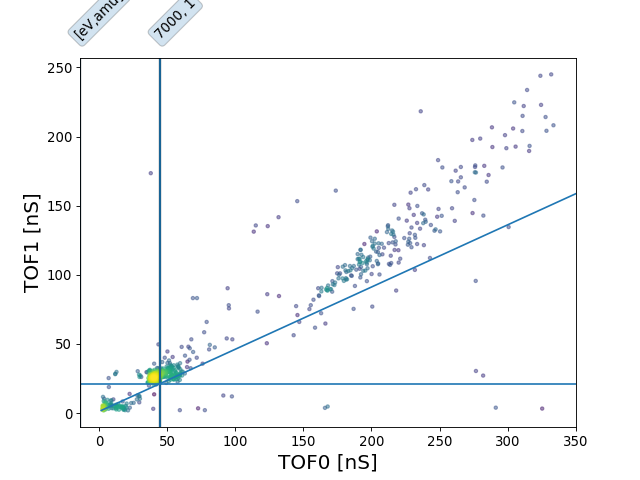

signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal
signal


(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='TOF0 [nS]', ylabel='TOF1 [nS]'>)

In [16]:
pm.plt.tofs_2d(dat,'TOF0','TOF1',
               tof_ref_lines = {'species':'H','ke':7000},
               tof_mass_line = 7000,
               plt_type = 'scatter')

In [4]:
dat = jill.querywhen('select * from ILO_EM_DE where dateTime between "2022-11-16 13:50" and "2022-11-16 14:50"')

In [6]:
dat.keys()

Index(['dateTime', 'SHCOARSE', 'level_0', 'SPIN_SECONDS', 'SPIN_SUBSECONDS',
       'DIRECT_EVENT_COUNT', 'order', 'OFFSET_MS', 'TOF0', 'TOF1', 'TOF2',
       'TOF3', 'VALIDSTART0', 'VALIDSTART1', 'VALIDSTART2', 'VALIDSTART3',
       'VALIDSTOP0', 'VALIDSTOP1', 'VALIDSTOP2', 'VALIDSTOP3', 'VALIDTOF0',
       'VALIDTOF1', 'VALIDTOF2', 'VALIDTOF3', 'tag'],
      dtype='object')

Tof Rates as function of time
- vs mcp setting
- threshold setting
- pac setting
- beam on or off

sdfds


(<Figure size 900x1600 with 4 Axes>,
 array([<Axes: xlabel='TOF0 [nS]'>, <Axes: xlabel='TOF1 [nS]'>,
        <Axes: xlabel='TOF2 [nS]'>, <Axes: xlabel='TOF3 [nS]'>],
       dtype=object))

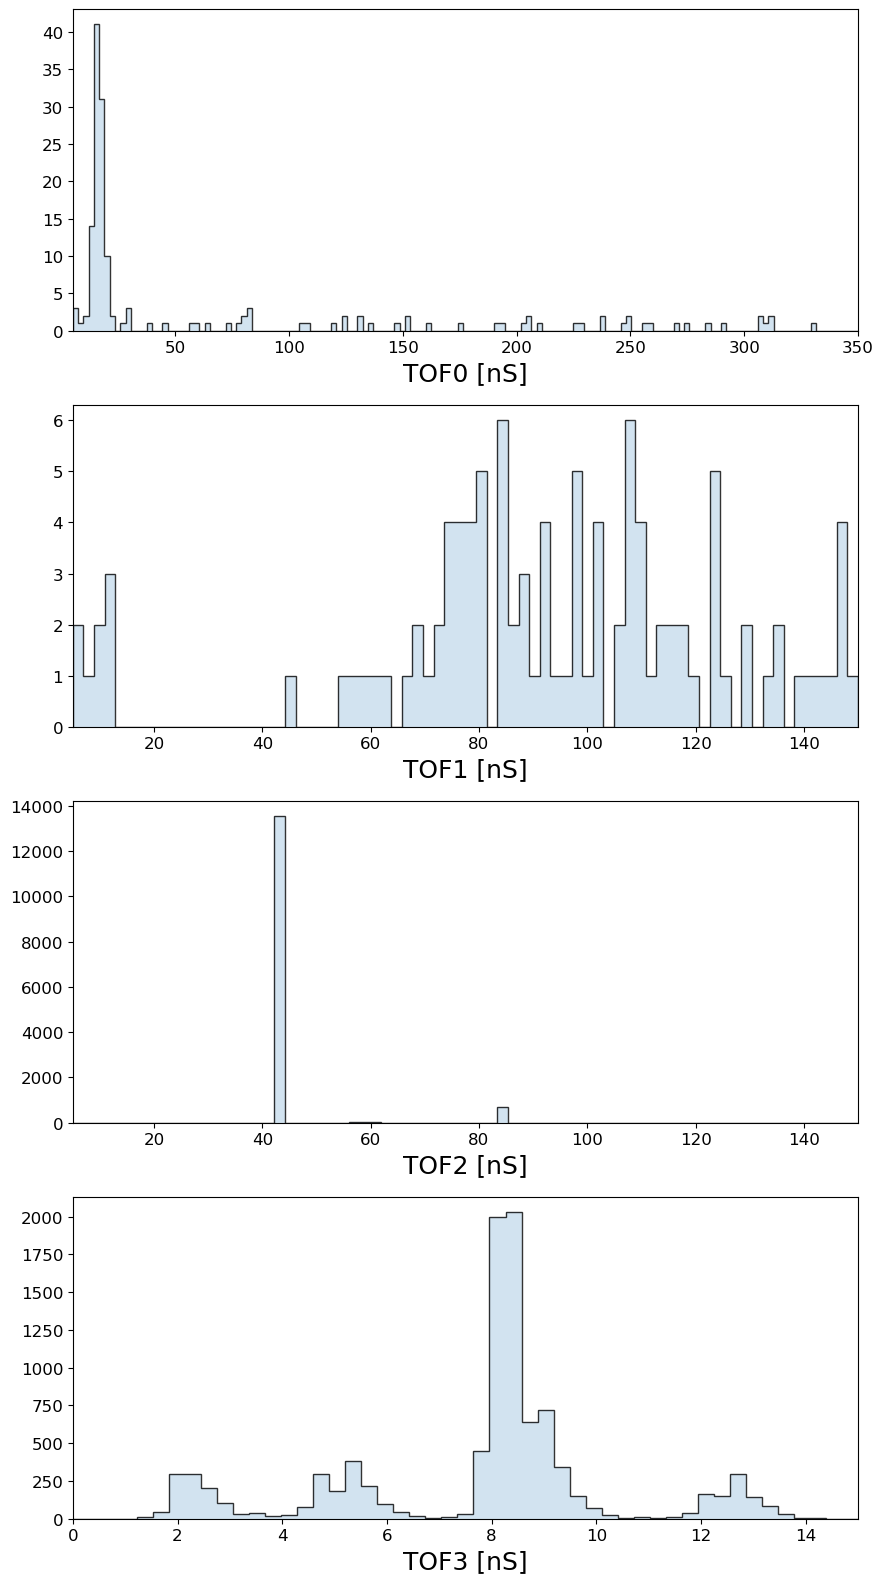

In [43]:

pm.plt.plot_tofs(dat)